Text(0, 0.5, 'count')

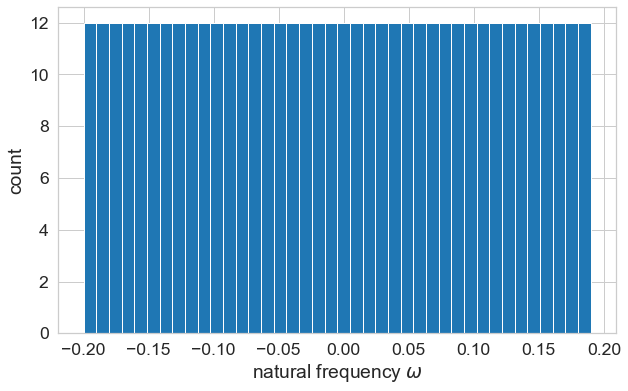

In [4]:
import numpy as np
import matplotlib.pyplot as plt #library used to make plots
import networkx as nx #library for complex systems (graphs)
import seaborn as sns #library to make statistical plots
from scipy.stats import linregress
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity #'pip install kuramoto' from terminal first

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

N=np.int(480) #number of oscillators

# Interactions are represented as an adjacency matrix _A_, a 2D numpy ndarray.
# Instantiate a random graph 
graph_nx = nx.erdos_renyi_graph(N, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx) #and transform into an adjacency matrix

#generate a distribution of M evenly spaced frequencies in [-gamma,gamma] for gamma=0.2 Hz
M=np.int(40) #number of groups of oscillators with common natural frequency
d=np.int(N/M) #number of oscillators in every group with common frequency
gamma=0.2 #Hz
g=np.full(d, -gamma) #start the first d elements of g
for i in range(1,M): #fill in the following elements with incresing frequencies
    gp=np.full(d,-gamma+i*2*gamma/M)
    g=np.concatenate((g,gp))
   
plt.figure(figsize=(10,6)) #create figure
plt.hist(g, bins=M) #plot the frequency distribution
plt.xlabel(r'natural frequency $\omega$')
plt.ylabel('count')

<AxesSubplot:xlabel='Time', ylabel='$\\sin(\\theta)$'>

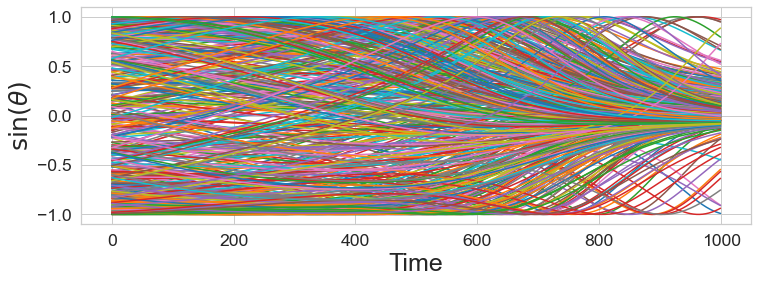

In [41]:
# Instantiate model with parameters
T=10 #time of observation
dt=0.01 #length of time steps
model = Kuramoto(coupling=1, dt=dt, T=T, n_nodes=len(graph))
model.natfreqs =g #use the discrete frequency distribution created before
# Run simulation - output is time series for all nodes (node vs time)
act_mat = model.run(adj_mat=graph)

# Plot all the phases in time (function defined in kuramoto.py)
plot_activity(act_mat)



Text(0.5, 0, '$t$')

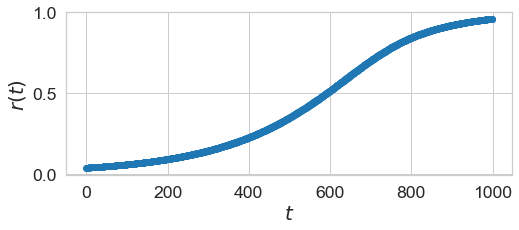

In [42]:
# Plot evolution of global order parameter R_t
plot_phase_coherence(act_mat)
plt.ylabel(r'$r(t)$')
plt.xlabel(r'$t$')

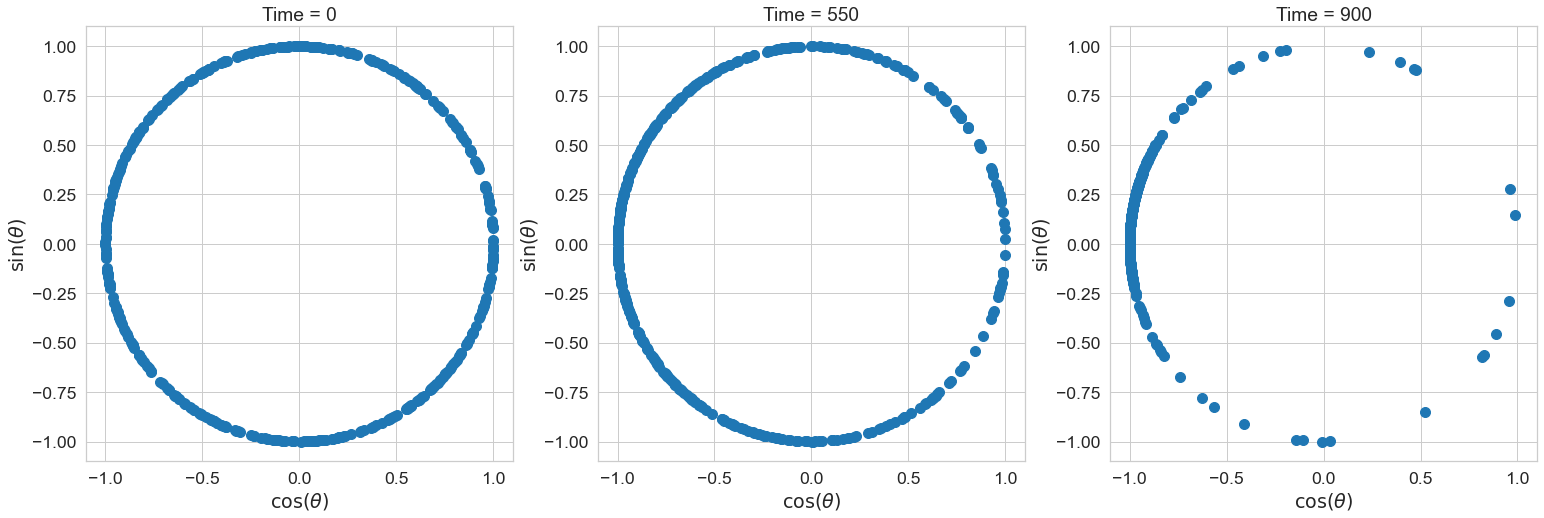

In [43]:
# Plot oscillators in complex plane at times t = 0, 550, 900
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(26, 8),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',
                         })
times = [0, 550, 900]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]),
            np.sin(act_mat[:, time]),
            'o',
            markersize=10)
    ax.set_title(f'Time = {time}')

r value is: 0.9999692462127485
slope is: 0.4487220271816353


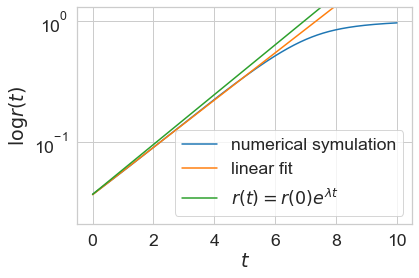

In [54]:
#define the order parameter r(t) from scratch to be alble to plot in log scale
r=abs(sum(np.exp(1j*act_mat))*N**(-1))
time=np.linspace(0,T,np.int(T/dt))
plt.semilogy(time,r, label='numerical symulation')
plt.xlabel(r'$t$')
plt.ylabel(r'$\log r(t)$')
#compare to an exponential model
l=0.47304 #eigenvalues lambda from analytical model
mod=r[0]*np.exp(l*time)
tmax=np.int(250)
result=linregress(time[0:tmax], np.log(r[0:tmax]))#make linear regression on the first tmax time steps
rho=result.rvalue #r value (Pearson coefficient) of the linear regression 
print('r value is:',rho) #find the Pearson coefficient from the linear regression
m=result.slope
print('slope is:',m)#find the slope from the linear regression
y=np.exp(result.intercept+result.slope*time)#exponential growth from linear regression
plt.semilogy(time,y,label='linear fit')
plt.semilogy(time, mod, label=r'$r(t)=r(0)e^{\lambda t}$')
plt.ylim((0.021,1.3))
plt.legend()